In [1]:
# Importing all required Libraries

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from math import sqrt
%matplotlib inline

In [2]:
#Loading Dataset:

'''This Dataset is loaded from the path specified below, In order to load please use the correct path of downloaded Dataset from your local system.'''

CO2 = pd.read_csv(r'C:\Users\sumit\Desktop\ML Project CO2 emission\Canada_CO2_Emissions_per_Capita.csv')
CO2.head()

,Entity,Year,Emissions
0,Canada,1870,0.320623
1,Canada,1871,0.460351
2,Canada,1872,0.471082
3,Canada,1873,0.405382
4,Canada,1874,0.403578


In [3]:
# Exploratory Data Analysis (EDA)

'''The pandas.DataFrame.dropna function removes missing values (e.g. NaN, NaT), if viewed'''

CO2.dropna(how='all', axis='columns') 


,Entity,Year,Emissions
0,Canada,1870,0.320623
1,Canada,1871,0.460351
2,Canada,1872,0.471082
3,Canada,1873,0.405382
4,Canada,1874,0.403578
...,...,...,...
147,Canada,2017,15.639457
148,Canada,2018,15.778724
149,Canada,2019,15.582994
150,Canada,2020,14.116710


In [4]:
# Change datatype of Emissions column as (float) and setting precision to 5 places.

pd.set_option('display.precision', 5)

CO2['Emissions'] = CO2['Emissions'].astype(float) 
CO2.head() 

,Entity,Year,Emissions
0,Canada,1870,0.32062
1,Canada,1871,0.46035
2,Canada,1872,0.47108
3,Canada,1873,0.40538
4,Canada,1874,0.40358


In [5]:
# Hiding the Entity column to begin Visualization

cdf = CO2[['Year', 'Emissions']] 
cdf.head() 



,Year,Emissions
0,1870,0.32062
1,1871,0.46035
2,1872,0.47108
3,1873,0.40538
4,1874,0.40358


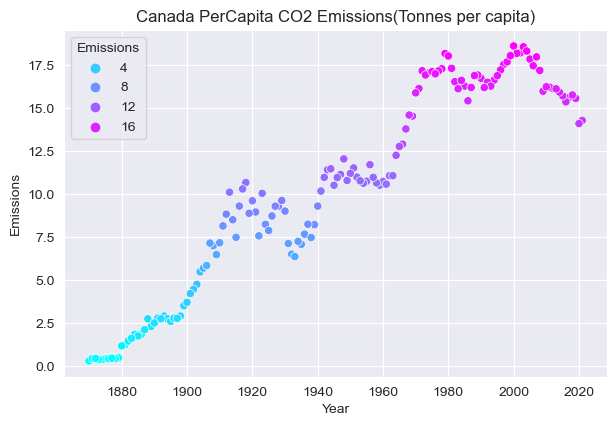

In [6]:
# Defining sample to create intial visuals (Scatter plot)

sample_df = CO2.sample(frac=1.0, random_state=17) 

sns.set_style('darkgrid')    # setting grid color 

plt.figure(figsize=(7, 4.5))  # define figure size

g1 = sns.scatterplot(data=sample_df, x='Year', y='Emissions', hue='Emissions', palette='cool', legend=True) 

g1.set(title='Canada PerCapita CO2 Emissions(Tonnes per capita)') #to add title on graph

plt.show()

In [7]:
# Splitting the dataset in training and Testing - Train : 75% & Test : 25%  

'''Due to size of the dataset, we splitted it into default 75-25 for training & testing data respectively'''

X_train, X_test, y_train, y_test = train_test_split(CO2.Year.values.reshape(-1, 1), CO2.Emissions.values, test_size=0.25, random_state=11) 


In [8]:
# Validating Split  

X_train.shape 

(114, 1)

In [9]:
# Validating Split

X_test.shape 

(38, 1)

In [10]:
# Training and Testing the model through Linear Regression

''' Passing the Train data to the estimator LinearRegression'''

linear_regression = LinearRegression()  

linear_regression.fit(X=X_train, y=y_train) 

''' Printing the coefficients & intercepts'''

linear_regression.coef_ 

linear_regression.intercept_ 

print ('Coefficients: ', linear_regression.coef_ )
print ('Intercept: ', linear_regression.intercept_)


Coefficients:  [0.12158391]
Intercept:  -226.17194111098672


In [11]:
# Predictive Analysis and Results

Predicted = linear_regression.predict(X_test) 

Expected = y_test 

for p, e in zip(Predicted[::5], Expected[::5]):  # check every 5th element 

    print(f'Predicted: {p:.2f}, Expected: {e:.2f}') 

'''lambda implements y = mx + b '''

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_) 



Predicted: 15.17, Expected: 16.30
Predicted: 2.28, Expected: 0.51
Predicted: 18.45, Expected: 16.15
Predicted: 6.17, Expected: 8.17
Predicted: 16.27, Expected: 16.64
Predicted: 2.53, Expected: 1.26
Predicted: 1.19, Expected: 0.32
Predicted: 14.56, Expected: 18.05


In [12]:
# Predicting CO2 emissions in the year 2030 for Canada, The year Canada aims to be Carbon neutral in line with the Paris Agreement
predict(2030)  


array([20.64340537])

In [13]:
predict(2040)

array([21.85924452])

In [14]:
predict(2050)

array([23.07508367])

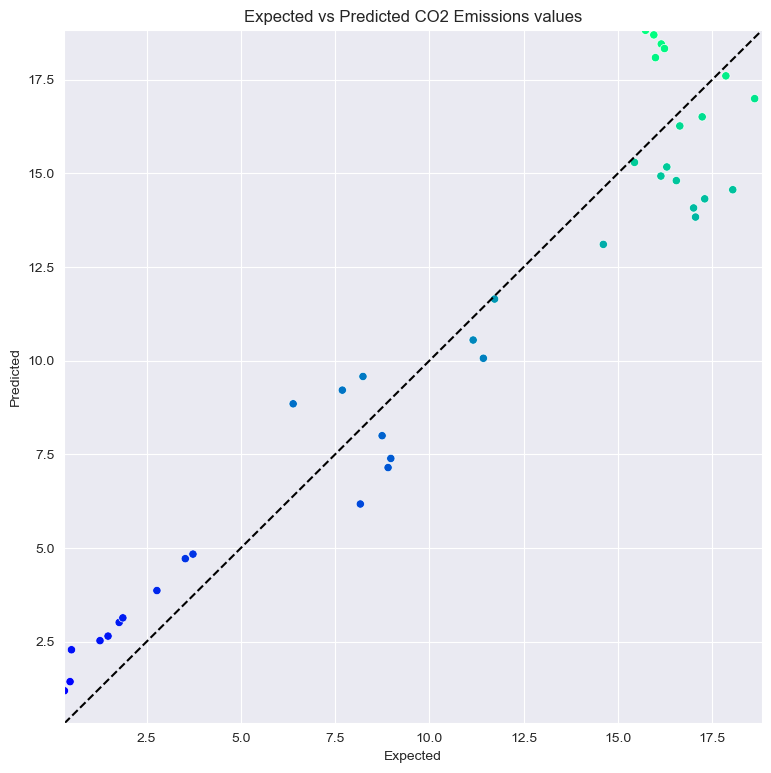

In [15]:
# Visualizing the Expected vs. Predicted values for Canada CO2 emissions

CO2_Predict = pd.DataFrame()

CO2_Predict['Expected'] = pd.Series(Expected)
CO2_Predict['Predicted'] = pd.Series(Predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=CO2_Predict, x='Expected', y='Predicted', hue='Predicted', palette='winter', legend=False)

axes.set(title='Expected vs Predicted CO2 Emissions values') #to add title on graph

start = min(Expected.min(), Predicted.min())
end = max(Expected.max(), Predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')


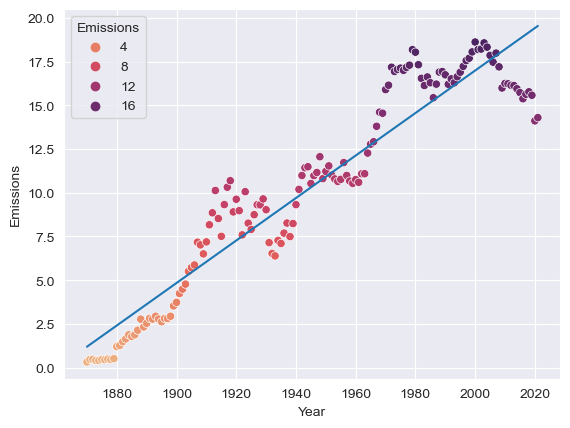

In [16]:
# Visualization with Regression Line  

axes = sns.scatterplot(data=CO2, x='Year', y='Emissions', hue='Emissions', palette='flare', legend=True)   

x = np.array([min(CO2.Year.values), max(CO2.Year.values)]) 

y = predict(x) 

line = plt.plot(x, y)

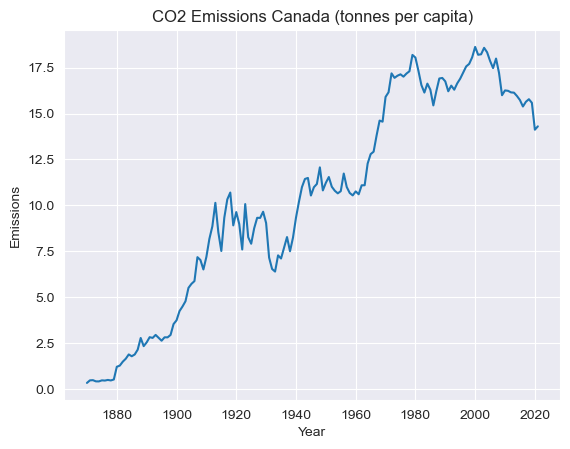

In [17]:
# Plotting in Timeseries through Simple Linear Regression

plt.xlabel('Year')
plt.ylabel('Emissions')

plt.plot(CO2['Year'], CO2['Emissions'])

plt.title('CO2 Emissions Canada (tonnes per capita)')

plt.show()

In [18]:
# Evaluation of the Model ( Root Mean Squared Error(RMSE), Mean Squared Error(MSE), Mean Absolute Error(MAE))


linear_rmse = np.sqrt(mean_squared_error(Expected, Predicted))

linear_mse = mean_squared_error(Expected, Predicted)

linear_mae = mean_absolute_error(Expected, Predicted) 


print ("RMSE: ", linear_rmse) #RMSE
print ("MSE: ", linear_mse) #MSE
print ("MAE: ", linear_mae) #MAE

RMSE:  1.776750150880522
MSE:  3.156841098653957
MAE:  1.5547228303511558


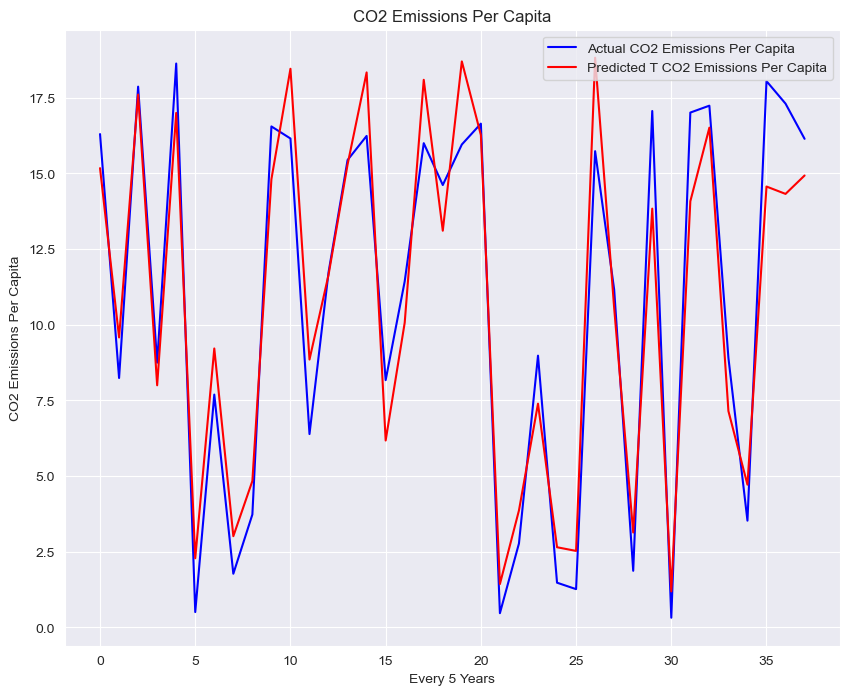

In [19]:
# Accuracy Visualization

plt.figure(figsize=(10,8))
plt.plot(Expected, color='blue', label='Actual CO2 Emissions Per Capita')
plt.plot(Predicted , color='red', label='Predicted T CO2 Emissions Per Capita')

plt.title('CO2 Emissions Per Capita')
plt.xlabel('Every 5 Years')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()